# KNN-Part-1 - MNIST_Hand-Written-Digit-Datasets

In [71]:
# importing the dataset digits from sklearn
# from sklearn.datasets import load_digits
# digits = load_digits()
#pip install python-mnist
import os
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
import struct
from PIL import Image


In [122]:
current_directory = os.getcwd()
print(current_directory)
#mndata = MNIST('./MNISTDataset')
mndata = MNIST('./dataset/train-images-idx3-ubyte')
images, labels = mndata.load_training()

# images_array = np.array(images)
# labels_array = np.array(labels)

data = np.array(images)
target = np.array(labels)

print("Images shape:", data.shape)
print("Labels shape:", target.shape)


#print(type (images.jpg))


C:\Users\NITB\Downloads
Images shape: (60000, 784)
Labels shape: (60000,)


In [108]:
first_image = data[59999,:]
print(first_image)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  38  48  48  22   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254 254 212
  27   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  67 172 254 254 225 218 218 237 248  40   

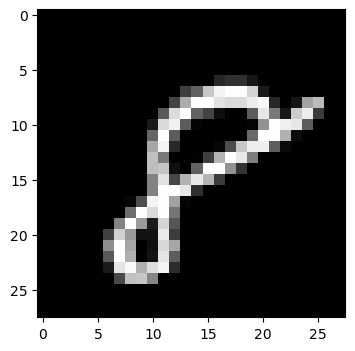

In [109]:
plt.figure(figsize=(10,4))
plt.imshow(np.reshape(first_image, (28,28)), cmap=plt.cm.gray)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [119]:
#####@# this cell code runs without error

from PIL import Image
# import numpy as np
# import struct
# import os

# Load the existing MNIST dataset
current_directory = os.getcwd()
print(current_directory)
#mndata = MNIST('./MNISTDataset')
mndata = MNIST('./dataset/train-images-idx3-ubyte')
images, labels = mndata.load_training()

# images_array = np.array(images)
# labels_array = np.array(labels)

data = np.array(images)
target = np.array(labels)

# Load and preprocess your custom image
img = Image.open("test4.png")
img = img.resize((28, 28))
lum_img = 255 - np.array(img.convert('L'))
your_image_label = 5
your_image = lum_img.flatten()

# Convert the image and label to bytes
your_image_bytes = your_image.astype(np.uint8).tobytes()
your_label_byte = your_image_label.to_bytes(1, byteorder='big')

#Append your image and label data to the original MNIST data
# new_images = np.concatenate((images, [your_image]), axis=0)
# new_labels = np.concatenate((labels, [your_image_label]), axis=0)

new_images = np.append(images, [your_image], axis=0)
new_labels = np.append(labels, your_image_label)  # Append label

new_images = new_images.reshape((-1, 28 * 28))

# new_images = np.vstack((images, your_image))  # Append vertically
# new_labels = np.append(labels, your_image_label)  # Append label
# # wb, rb+


new_images_bytes = new_images.astype(np.uint8).tobytes()
new_labels_bytes = new_labels.astype(np.uint8).tobytes()



# Save the new images and labels to IDX files
def save_idx_file(images, labels, images_path, labels_path):
    with open(images_path, 'ab+') as images_file:
        images_file.write(struct.pack('>4i', 0x00000803, len(images), 28, 28))
        images_file.write(images)
        images_file.flush() 

    with open(labels_path, 'ab+') as labels_file:
        labels_file.write(struct.pack('>2i', 0x00000801, len(labels)))
        labels_file.write(labels)
        labels_file.flush()

# Define paths for saving the custom data
# custom_images_path = './dataset/train-images.idx3-ubyte'
# custom_labels_path = './dataset/train-labels.idx1-ubyte'

# custom_images_path = './dataset/train-images-idx3-ubyte/train-images-idx3-ubyte.idx3-ubyte'
# custom_labels_path = './dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte.idx1-ubyte'

# custom_images_path = os.path.join(current_directory, 'dataset', 'train-images-idx3-ubyte', 'train-images-idx3-ubyte')
# custom_labels_path = os.path.join(current_directory, 'dataset', 'train-labels-idx1-ubyte', 'train-labels-idx1-ubyte')
# print (custom_images_path)

custom_images_path = './dataset/train-images-idx3-ubyte/train-images-idx3-ubyte'
custom_labels_path = './dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte'


# Save the custom images and labels to IDX files
save_idx_file(your_image_bytes, your_label_byte, custom_images_path, custom_labels_path)
print("Files saved successfully. Closing files...")

# Load the updated MNIST dataset
mndata_updated = MNIST('./dataset/train-images-idx3-ubyte')
updated_images, updated_labels = mndata_updated.load_training()

data = np.array(updated_images)
target = np.array(updated_labels)
# Print the updated shape
print("Updated Images Shape:", data.shape)
print("Updated Labels Shape:", target.shape)


appended_image_position = len(images) #+ 1  # Assuming 1-based indexing
appended_image = images[appended_image_position-1]
appended_label = labels[appended_image_position-1]

print(f"Appended Image Label: {appended_label}")
print(f"Appended Image Data: {appended_image}")

#first_image = data[0,:]
# for element in target:
#     first_image = element #target[0]
#     print(first_image)


# plt.figure(figsize=(10,4))
# plt.imshow(np.reshape(first_image, (28,28)), cmap=plt.cm.gray)

C:\Users\NITB\Downloads
Files saved successfully. Closing files...
Updated Images Shape: (60000, 784)
Updated Labels Shape: (60000,)
Appended Image Label: 8
Appended Image Data: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 38, 48, 48, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 62, 97, 198, 243, 254, 254, 212, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 67, 172, 254, 254, 225, 218, 218, 237, 248, 40, 0, 21, 164, 187, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

TypeError: a bytes-like object is required, not 'list'

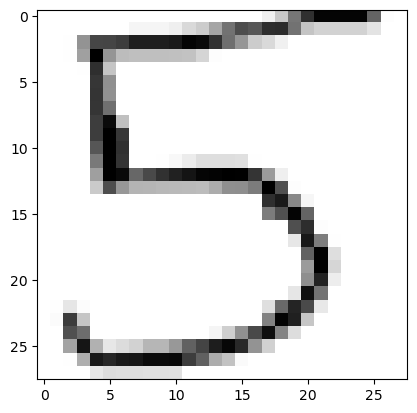

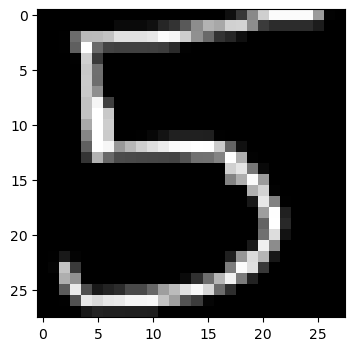

In [32]:
# ading my images
from PIL import Image
img=Image.open("test4.png")
img=img.resize((28,28))
imgplot=plt.imshow(img)

img_array=np.array(img)
lum_img=img_array[:,:,0]
lum_img=255-lum_img
lum_img=lum_img.reshape(1,-1)
lum_img

plt.figure(figsize=(10,4))
plt.imshow(np.reshape(lum_img, (28,28)), cmap=plt.cm.gray)
your_image_label = 5
your_image = np.array(lum_img).flatten()


# Convert the image and label to bytes
your_image_bytes = your_image.astype(np.uint8).tobytes()
your_label_byte = your_image_label.to_bytes(1, byteorder='big')

# Append your image and label data to the original MNIST data
new_images = np.concatenate((images, [your_image]), axis=0)
new_labels = np.concatenate((labels, [your_image_label]), axis=0)

# Save the new images and labels to IDX files
def save_idx_file(images, labels, images_path, labels_path):
    with open(images_path, 'wb') as images_file:
        images_file.write(struct.pack('>4i', 0x00000803, len(images), 28, 28))
        images_file.write(images)

    with open(labels_path, 'wb') as labels_file:
        labels_file.write(struct.pack('>2i', 0x00000801, len(labels)))
        labels_file.write(labels)
        
        
        
mnist_path = './dataset'
#custom_images_path = os.path.join(mnist_path, 'train-images.idx3-ubyte')
custom_images_path = './dataset/train-images.idx3-ubyte'
custom_labels_path = './dataset/train-labels.idx1-ubyte'
#custom_labels_path = os.path.join(mnist_path, 'train-labels.idx1-ubyte')
save_idx_file(images, labels, custom_images_path, custom_labels_path)

#print("Your image and label added to the dataset.")

# your_images = np.array([your_image])
# your_labels = np.array([your_image_label])

# # Append your image and label to the existing MNIST dataset
# combined_images = np.concatenate((images, your_images), axis=0)
# combined_labels = np.concatenate((labels, your_labels), axis=0)

# mndata.save_images_and_labels('./dataset/train-images-idx3-ubyte', combined_images, combined_labels, len(combined_images))

# print("Your image and label added to the dataset.")


In [ ]:
# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print("Image Dataset", digits.data.shape)

In [ ]:
first_image = digits.data[0,:]

In [ ]:
x = digits.data
type (x)

In [ ]:
# print first image
print(first_image)

In [ ]:
plt.figure(figsize=(10,4))
plt.imshow(np.reshape(first_image, (8,8)), cmap=plt.cm.gray)

# Visualizing Dataset

In [ ]:
plt.figure(figsize=(30,7))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 40)

# Spliting Dataset

In [ ]:
# spliting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [ ]:
# print the shape of x_train
print(X_train.shape)

In [ ]:
# print the shape of x_test
print(X_test.shape)

In [ ]:
# checking shape of y_test
y_test.shape

# Checking which k size has least error

In [ ]:
# #finding error 
# #this is absolute ok code and be used at the initial stage to determine which k has minimum value and that k be used
# error = []
# for i in range(1,30):
#     #print (i)
#     knn = KNN(n_neighbors=i)
#     knn.fit(X_train,y_train)
#     pred_i = knn.predict(X_test)
#     error.append(np.mean(pred_i != y_test))
# #print(error)

# Training

In [ ]:
# import knnclassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.naive_bayes import GaussianNB

# assgin this model into classifier
classifier = KNN(n_neighbors=6)
# fit the model
classifier.fit(X_train, y_train)

NBClassifier=GaussianNB()
NBClassifier.fit(X_train, y_train)
#prediction
y_pred = classifier.predict(X_test)

y_pred_NBG = NBClassifier.predict(X_test)

# Model Evaluation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

mse=mse=mean_squared_error(y_test,y_pred)
print("MSE for KNN:",mse)

#for guassioan KB

cm = metrics.confusion_matrix(y_test, y_pred_NBG)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
mse=mean_squared_error(y_test,y_pred_NBG)

print("MSE for Naive Bayes:",mse)

# Compare Error Rate ith the K Value

In [ ]:
# finding error 
# this is absolute ok code and be used at the initial stage to determine which k has minimum value and that k be used
error = []
for i in range(1,30):
    knn = KNN(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
import joblib

In [ ]:
joblib.dump(classifier, 'KNN-digit-classification')

In [ ]:
# plot the comparison of error
